In [1]:
from collections import Counter
from sklearn.metrics import classification_report

import cv2 as cv
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
from annoy import AnnoyIndex

# 1. Download the data

In [2]:
def load_data(folder, flag):
    if flag in os.listdir(folder):
       data = "%s/%s/" % (folder, flag)
       images  = []
       classes = []
       for f in os.listdir(data):
           carpeta = data+f
           for counter, obj in enumerate(os.listdir(carpeta)):
               path = carpeta +'/' + obj
               img = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2GRAY)
               images.append(img)
               classes.append(f)
       return classes, images
    else:
        print("Error")

In [3]:
y_train, x_train = load_data('data', 'train')
y_validation, x_validation = load_data('data', 'validation')

In [4]:
print(f"Train size {len(x_train)}, Test size {len(y_train)}")
print(f"Train size {len(x_validation)}, Test size {len(y_validation)}")

Train size 694, Test size 694
Train size 200, Test size 200


alien


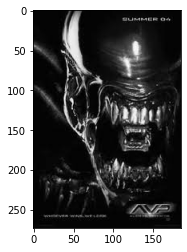

predator


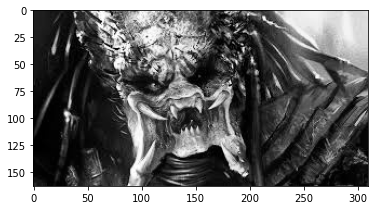

In [5]:
print(y_train[13])
plt.imshow(x_train[13], cmap='gray')
plt.show()

print(y_validation[-13])
plt.imshow(x_validation[-13], cmap='gray')
plt.show()

In [6]:
x_train[13]

array([[ 4,  4,  4, ...,  4,  4,  4],
       [ 4,  4,  4, ...,  4,  4,  4],
       [ 4,  4,  4, ...,  4,  4,  4],
       ...,
       [ 6,  7,  7, ..., 12, 12,  4],
       [ 7,  7,  7, ...,  4,  4,  4],
       [ 5,  5,  5, ...,  3,  3,  5]], dtype=uint8)

# 2. Compute SIFT desciptors

In [7]:
def generate_sift_descriptors(lista):    
    sift = cv.SIFT_create()
    sift_list = list()
    for image in lista:
        kp, des = sift.detectAndCompute(image, None)
        sift_list.append(des)
    return sift_list

In [8]:
x_train_sift = generate_sift_descriptors(x_train)
x_validation_sift = generate_sift_descriptors(x_validation)

In [9]:
# Test

assert x_train_sift[13].shape == (376, 128)
assert x_train_sift[13][0][0] == 84.0

In [25]:
x_train_sift[0].shape

(205, 128)

In [26]:
x_train_sift[1].shape

(487, 128)

# 3. Organize these vectors in the index (somehow)

In [46]:
index = AnnoyIndex(128, 'angular')  

for k in range(len(x_train_sift)):
    for ele in x_train_sift[k]:
        index.add_item(k, ele)
        
index.build(8)

True

# 4. Classification

In [47]:
def naive_classifier(vecs, index, classes, n):
    predicted = []
    for v in vecs:
        for image_class in index.get_nns_by_vector(v, n):
            predicted.append(classes[image_class])
    counter = Counter(predicted)
    result = counter.most_common(1)
    return result[0][0]

# Test

In [48]:
for number in range(1,50):
    predictions = []
    print(number)
    for sample in tqdm(x_validation_sift):
        predictions.append(naive_classifier(sample, index, y_train, n = number))
    print(classification_report(y_validation, predictions))

1


100%|██████████| 200/200 [00:03<00:00, 58.97it/s]


              precision    recall  f1-score   support

       alien       0.67      0.30      0.41       100
    predator       0.55      0.85      0.67       100

    accuracy                           0.57       200
   macro avg       0.61      0.57      0.54       200
weighted avg       0.61      0.57      0.54       200

2


100%|██████████| 200/200 [00:01<00:00, 105.33it/s]


              precision    recall  f1-score   support

       alien       0.73      0.24      0.36       100
    predator       0.54      0.91      0.68       100

    accuracy                           0.57       200
   macro avg       0.64      0.57      0.52       200
weighted avg       0.64      0.57      0.52       200

3


100%|██████████| 200/200 [00:01<00:00, 118.42it/s]


              precision    recall  f1-score   support

       alien       0.76      0.31      0.44       100
    predator       0.57      0.90      0.69       100

    accuracy                           0.60       200
   macro avg       0.66      0.60      0.57       200
weighted avg       0.66      0.60      0.57       200

4


100%|██████████| 200/200 [00:01<00:00, 116.82it/s]


              precision    recall  f1-score   support

       alien       0.71      0.29      0.41       100
    predator       0.55      0.88      0.68       100

    accuracy                           0.58       200
   macro avg       0.63      0.58      0.55       200
weighted avg       0.63      0.58      0.55       200

5


100%|██████████| 200/200 [00:01<00:00, 110.61it/s]


              precision    recall  f1-score   support

       alien       0.68      0.27      0.39       100
    predator       0.54      0.87      0.67       100

    accuracy                           0.57       200
   macro avg       0.61      0.57      0.53       200
weighted avg       0.61      0.57      0.53       200

6


100%|██████████| 200/200 [00:02<00:00, 95.78it/s] 


              precision    recall  f1-score   support

       alien       0.66      0.29      0.40       100
    predator       0.54      0.85      0.66       100

    accuracy                           0.57       200
   macro avg       0.60      0.57      0.53       200
weighted avg       0.60      0.57      0.53       200

7


100%|██████████| 200/200 [00:02<00:00, 96.43it/s]


              precision    recall  f1-score   support

       alien       0.67      0.34      0.45       100
    predator       0.56      0.83      0.67       100

    accuracy                           0.58       200
   macro avg       0.61      0.58      0.56       200
weighted avg       0.61      0.58      0.56       200

8


100%|██████████| 200/200 [00:02<00:00, 83.17it/s]


              precision    recall  f1-score   support

       alien       0.69      0.40      0.51       100
    predator       0.58      0.82      0.68       100

    accuracy                           0.61       200
   macro avg       0.63      0.61      0.59       200
weighted avg       0.63      0.61      0.59       200

9


100%|██████████| 200/200 [00:02<00:00, 66.78it/s]


              precision    recall  f1-score   support

       alien       0.70      0.43      0.53       100
    predator       0.59      0.82      0.69       100

    accuracy                           0.62       200
   macro avg       0.65      0.62      0.61       200
weighted avg       0.65      0.62      0.61       200

10


100%|██████████| 200/200 [00:01<00:00, 105.77it/s]


              precision    recall  f1-score   support

       alien       0.71      0.42      0.53       100
    predator       0.59      0.83      0.69       100

    accuracy                           0.62       200
   macro avg       0.65      0.62      0.61       200
weighted avg       0.65      0.62      0.61       200

11


100%|██████████| 200/200 [00:02<00:00, 72.36it/s]


              precision    recall  f1-score   support

       alien       0.69      0.43      0.53       100
    predator       0.59      0.81      0.68       100

    accuracy                           0.62       200
   macro avg       0.64      0.62      0.61       200
weighted avg       0.64      0.62      0.61       200

12


100%|██████████| 200/200 [00:01<00:00, 101.51it/s]


              precision    recall  f1-score   support

       alien       0.71      0.47      0.57       100
    predator       0.60      0.81      0.69       100

    accuracy                           0.64       200
   macro avg       0.66      0.64      0.63       200
weighted avg       0.66      0.64      0.63       200

13


100%|██████████| 200/200 [00:02<00:00, 96.47it/s]


              precision    recall  f1-score   support

       alien       0.69      0.57      0.62       100
    predator       0.63      0.74      0.68       100

    accuracy                           0.66       200
   macro avg       0.66      0.66      0.65       200
weighted avg       0.66      0.66      0.65       200

14


100%|██████████| 200/200 [00:02<00:00, 89.25it/s] 


              precision    recall  f1-score   support

       alien       0.71      0.62      0.66       100
    predator       0.66      0.75      0.70       100

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.68       200
weighted avg       0.69      0.69      0.68       200

15


100%|██████████| 200/200 [00:02<00:00, 87.87it/s]


              precision    recall  f1-score   support

       alien       0.70      0.64      0.67       100
    predator       0.67      0.72      0.69       100

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.68      0.68      0.68       200

16


100%|██████████| 200/200 [00:02<00:00, 68.77it/s]


              precision    recall  f1-score   support

       alien       0.73      0.62      0.67       100
    predator       0.67      0.77      0.72       100

    accuracy                           0.69       200
   macro avg       0.70      0.70      0.69       200
weighted avg       0.70      0.69      0.69       200

17


100%|██████████| 200/200 [00:02<00:00, 80.31it/s]


              precision    recall  f1-score   support

       alien       0.74      0.60      0.66       100
    predator       0.66      0.79      0.72       100

    accuracy                           0.69       200
   macro avg       0.70      0.70      0.69       200
weighted avg       0.70      0.69      0.69       200

18


100%|██████████| 200/200 [00:02<00:00, 83.72it/s] 


              precision    recall  f1-score   support

       alien       0.74      0.62      0.67       100
    predator       0.67      0.78      0.72       100

    accuracy                           0.70       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.71      0.70      0.70       200

19


100%|██████████| 200/200 [00:02<00:00, 72.47it/s]


              precision    recall  f1-score   support

       alien       0.71      0.60      0.65       100
    predator       0.65      0.75      0.70       100

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.67       200
weighted avg       0.68      0.68      0.67       200

20


100%|██████████| 200/200 [00:02<00:00, 70.32it/s]


              precision    recall  f1-score   support

       alien       0.70      0.59      0.64       100
    predator       0.65      0.75      0.69       100

    accuracy                           0.67       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.67      0.67      0.67       200

21


100%|██████████| 200/200 [00:02<00:00, 74.68it/s]


              precision    recall  f1-score   support

       alien       0.71      0.61      0.66       100
    predator       0.66      0.75      0.70       100

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.68      0.68      0.68       200

22


100%|██████████| 200/200 [00:02<00:00, 77.86it/s]


              precision    recall  f1-score   support

       alien       0.70      0.64      0.67       100
    predator       0.67      0.72      0.69       100

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.68      0.68      0.68       200

23


100%|██████████| 200/200 [00:03<00:00, 56.32it/s]


              precision    recall  f1-score   support

       alien       0.70      0.69      0.69       100
    predator       0.69      0.70      0.70       100

    accuracy                           0.69       200
   macro avg       0.70      0.69      0.69       200
weighted avg       0.70      0.69      0.69       200

24


100%|██████████| 200/200 [00:02<00:00, 70.19it/s]


              precision    recall  f1-score   support

       alien       0.68      0.66      0.67       100
    predator       0.67      0.69      0.68       100

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.67       200
weighted avg       0.68      0.68      0.67       200

25


100%|██████████| 200/200 [00:02<00:00, 68.70it/s]


              precision    recall  f1-score   support

       alien       0.70      0.68      0.69       100
    predator       0.69      0.71      0.70       100

    accuracy                           0.69       200
   macro avg       0.70      0.70      0.69       200
weighted avg       0.70      0.69      0.69       200

26


100%|██████████| 200/200 [00:02<00:00, 67.93it/s]


              precision    recall  f1-score   support

       alien       0.71      0.67      0.69       100
    predator       0.69      0.72      0.70       100

    accuracy                           0.69       200
   macro avg       0.70      0.70      0.69       200
weighted avg       0.70      0.69      0.69       200

27


100%|██████████| 200/200 [00:02<00:00, 72.60it/s]


              precision    recall  f1-score   support

       alien       0.70      0.66      0.68       100
    predator       0.68      0.72      0.70       100

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.69      0.69      0.69       200

28


100%|██████████| 200/200 [00:02<00:00, 67.76it/s]


              precision    recall  f1-score   support

       alien       0.71      0.71      0.71       100
    predator       0.71      0.71      0.71       100

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200

29


100%|██████████| 200/200 [00:02<00:00, 67.64it/s]


              precision    recall  f1-score   support

       alien       0.72      0.71      0.72       100
    predator       0.72      0.73      0.72       100

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200

30


100%|██████████| 200/200 [00:03<00:00, 66.57it/s]


              precision    recall  f1-score   support

       alien       0.73      0.70      0.71       100
    predator       0.71      0.74      0.73       100

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200

31


100%|██████████| 200/200 [00:03<00:00, 65.72it/s]


              precision    recall  f1-score   support

       alien       0.74      0.73      0.73       100
    predator       0.73      0.74      0.74       100

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200

32


100%|██████████| 200/200 [00:03<00:00, 57.57it/s]


              precision    recall  f1-score   support

       alien       0.76      0.74      0.75       100
    predator       0.75      0.77      0.76       100

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.76      0.76      0.75       200

33


100%|██████████| 200/200 [00:03<00:00, 53.40it/s]


              precision    recall  f1-score   support

       alien       0.76      0.76      0.76       100
    predator       0.76      0.76      0.76       100

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200

34


100%|██████████| 200/200 [00:03<00:00, 64.48it/s]


              precision    recall  f1-score   support

       alien       0.73      0.71      0.72       100
    predator       0.72      0.74      0.73       100

    accuracy                           0.73       200
   macro avg       0.73      0.72      0.72       200
weighted avg       0.73      0.72      0.72       200

35


100%|██████████| 200/200 [00:03<00:00, 59.67it/s]


              precision    recall  f1-score   support

       alien       0.73      0.74      0.74       100
    predator       0.74      0.73      0.73       100

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200

36


100%|██████████| 200/200 [00:03<00:00, 55.41it/s]


              precision    recall  f1-score   support

       alien       0.73      0.70      0.71       100
    predator       0.71      0.74      0.73       100

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200

37


100%|██████████| 200/200 [00:03<00:00, 59.71it/s]


              precision    recall  f1-score   support

       alien       0.73      0.70      0.71       100
    predator       0.71      0.74      0.73       100

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200

38


100%|██████████| 200/200 [00:03<00:00, 56.15it/s]


              precision    recall  f1-score   support

       alien       0.70      0.68      0.69       100
    predator       0.69      0.71      0.70       100

    accuracy                           0.69       200
   macro avg       0.70      0.70      0.69       200
weighted avg       0.70      0.69      0.69       200

39


100%|██████████| 200/200 [00:03<00:00, 57.08it/s]


              precision    recall  f1-score   support

       alien       0.71      0.67      0.69       100
    predator       0.69      0.72      0.70       100

    accuracy                           0.69       200
   macro avg       0.70      0.70      0.69       200
weighted avg       0.70      0.69      0.69       200

40


100%|██████████| 200/200 [00:04<00:00, 43.56it/s]


              precision    recall  f1-score   support

       alien       0.69      0.67      0.68       100
    predator       0.68      0.70      0.69       100

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.68       200
weighted avg       0.69      0.69      0.68       200

41


100%|██████████| 200/200 [00:03<00:00, 51.76it/s]


              precision    recall  f1-score   support

       alien       0.69      0.67      0.68       100
    predator       0.68      0.70      0.69       100

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.68       200
weighted avg       0.69      0.69      0.68       200

42


100%|██████████| 200/200 [00:03<00:00, 57.07it/s]


              precision    recall  f1-score   support

       alien       0.69      0.68      0.69       100
    predator       0.69      0.70      0.69       100

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.69      0.69      0.69       200

43


100%|██████████| 200/200 [00:03<00:00, 52.33it/s]


              precision    recall  f1-score   support

       alien       0.71      0.68      0.69       100
    predator       0.69      0.72      0.71       100

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.70      0.70      0.70       200

44


100%|██████████| 200/200 [00:03<00:00, 54.35it/s]


              precision    recall  f1-score   support

       alien       0.69      0.67      0.68       100
    predator       0.68      0.70      0.69       100

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.68       200
weighted avg       0.69      0.69      0.68       200

45


100%|██████████| 200/200 [00:04<00:00, 47.12it/s]


              precision    recall  f1-score   support

       alien       0.69      0.70      0.70       100
    predator       0.70      0.69      0.69       100

    accuracy                           0.69       200
   macro avg       0.70      0.69      0.69       200
weighted avg       0.70      0.69      0.69       200

46


100%|██████████| 200/200 [00:03<00:00, 52.96it/s]


              precision    recall  f1-score   support

       alien       0.70      0.70      0.70       100
    predator       0.70      0.70      0.70       100

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.70      0.70      0.70       200

47


100%|██████████| 200/200 [00:04<00:00, 49.34it/s]


              precision    recall  f1-score   support

       alien       0.70      0.70      0.70       100
    predator       0.70      0.70      0.70       100

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.70      0.70      0.70       200

48


100%|██████████| 200/200 [00:03<00:00, 52.79it/s]


              precision    recall  f1-score   support

       alien       0.70      0.71      0.71       100
    predator       0.71      0.70      0.70       100

    accuracy                           0.70       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.71      0.70      0.70       200

49


100%|██████████| 200/200 [00:03<00:00, 53.30it/s]

              precision    recall  f1-score   support

       alien       0.71      0.71      0.71       100
    predator       0.71      0.71      0.71       100

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200



In [50]:
for number in [33]:
    predictions = []
    print(number)
    for sample in tqdm(x_validation_sift):
        predictions.append(naive_classifier(sample, index, y_train, n = number))
    print(classification_report(y_validation, predictions))

33


100%|██████████| 200/200 [00:05<00:00, 37.93it/s]

              precision    recall  f1-score   support

       alien       0.76      0.76      0.76       100
    predator       0.76      0.76      0.76       100

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200

